In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as  np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [3]:
import os
train_image_files_path='/content/drive/MyDrive/data/filetrain'
valid_image_files_path='/content/drive/MyDrive/data/filevalid'

In [4]:
label=['class1','class2','class3','class4','class5','class6','class7','class8']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [6]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

Found 671 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#LopCNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(48,48,3)))
model.add(MaxPooling2D(2,2))

#LopCNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation=tf.nn.relu))

model.add(Dense(8, activation=tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [10]:
EPOCHS=20
history=model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=3
)

Epoch 1/20
10/10 [==============================] - 283s 28s/step - loss: 2.0916 - acc: 0.1787 - val_loss: 2.0338 - val_acc: 0.1625
Epoch 2/20
10/10 [==============================] - 96s 10s/step - loss: 2.0023 - acc: 0.2163 - val_loss: 1.9498 - val_acc: 0.2250
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 1.8115 - acc: 0.3375 - val_loss: 1.5859 - val_acc: 0.3625
Epoch 4/20
10/10 [==============================] - 25s 3s/step - loss: 1.5310 - acc: 0.4469 - val_loss: 1.4238 - val_acc: 0.5000
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 1.2719 - acc: 0.5844 - val_loss: 0.9900 - val_acc: 0.6750
Epoch 6/20
10/10 [==============================] - 3s 346ms/step - loss: 1.0673 - acc: 0.6719 - val_loss: 0.7251 - val_acc: 0.8375
Epoch 7/20
10/10 [==============================] - 3s 332ms/step - loss: 0.8454 - acc: 0.7210 - val_loss: 0.5782 - val_acc: 0.8500
Epoch 8/20
10/10 [==============================] - 2s 135ms/step - loss: 0.6109 - 

Saving 4__M_Right_index_finger.BMP to 4__M_Right_index_finger.BMP
1/1 [==============================] - 0s 16ms/step
Gia tri du doan: class4


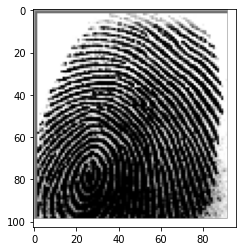

In [13]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded= files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=tf.keras.utils.load_img(path,target_size=(48,48))
  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images= np.vstack([x])
  y_predict = model.predict(images, batch_size=5)
  print('Gia tri du doan:', label[np.argmax(y_predict)])

In [ ]:
model.layers

In [ ]:
output_layers=[
    layer.output for layer in model.layers
]

In [ ]:
output_layers

[<KerasTensor: shape=(None, 46, 46, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 23, 23, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 21, 21, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense_1')>]

Saving 8__M_Right_thumb_finger.BMP to 8__M_Right_thumb_finger (3).BMP
(1, 48, 48, 3)
1/1 [==============================] - 0s 74ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


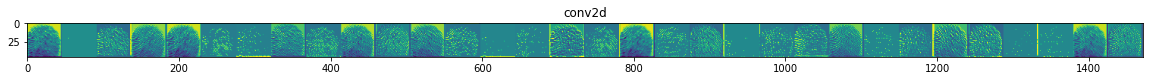

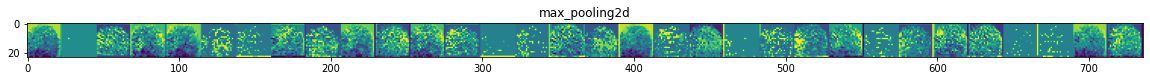

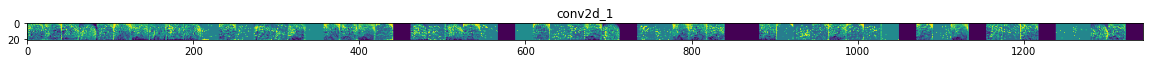

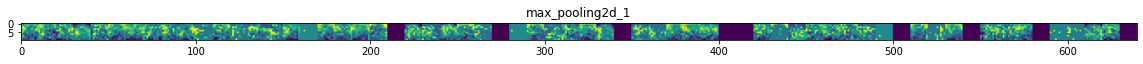

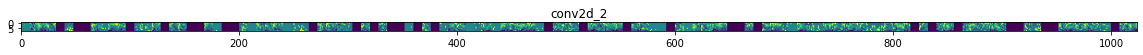

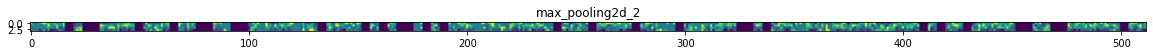

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' +fn
  img = tf.keras.utils.load_img(path, target_size=(48,48))
  x=tf.keras.utils.img_to_array(img)/255

  x=x.reshape((1,) + x.shape)
  print(x.shape)
  visualization_model= tf.keras.models.Model(inputs = model.input, outputs= output_layers)

  successive_feature_maps= visualization_model.predict(x)
  layer_names= [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape)==4:
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        x= feature_map[0,:,:,-i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x= np.clip(x, 0 , 255).astype('uint8')
        display_grid[:,i*size:(i+1)*size]=x
      scale = 20. / n_features
      plt.figure(figsize=(scale*n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')